<a href="https://colab.research.google.com/github/mironjee51300/VIRUSTEXTCODE/blob/main/ML_Automatic_Lazy_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!git clone https://github.com/mironjee51300/VIRUSTEXTCODE.git

fatal: destination path 'VIRUSTEXTCODE' already exists and is not an empty directory.


In [33]:
import os

# Specify the path to the folder you want to inspect
# For the current directory, you can use '.'
folder_path = '/content/VIRUSTEXTCODE'  # Example: 'C:/Users/YourUser/Documents' or '/home/youruser/my_folder'

try:
    # Get a list of all entries (files and directories) in the specified path
    folder_contents = os.listdir(folder_path)

    print(f"Contents of '{folder_path}':")
    # Iterate through the list and print each item
    for item in folder_contents:
        print(item)

except FileNotFoundError:
    print(f"Error: The folder '{folder_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of '/content/VIRUSTEXTCODE':
.git
.gitignore
NON-VIRUS TEXT FILE
README.md
VIRUS CODES-NOTEPAD


In [36]:
import os

# Virus files
virus_folder_path = "/content/VIRUSTEXTCODE/VIRUS CODES-NOTEPAD"
virus_file_names = []
virus_file_contents = []

for filename in os.listdir(virus_folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(virus_folder_path, filename)
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            virus_file_names.append(filename)
            virus_file_contents.append(f.read())

# Non-virus files
non_virus_folder_path = "/content/VIRUSTEXTCODE/NON-VIRUS TEXT FILE"
non_virus_file_names = []
non_virus_file_contents = []

for filename in os.listdir(non_virus_folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(non_virus_folder_path, filename)
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            non_virus_file_names.append(filename)
            non_virus_file_contents.append(f.read())

print("Virus files read:", len(virus_file_names))
print("Non-virus files read:", len(non_virus_file_names))

Virus files read: 51
Non-virus files read: 46


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the virus and non-virus file contents
virus_tfidf_matrix = tfidf_vectorizer.fit_transform(virus_file_contents)
non_virus_tfidf_matrix = tfidf_vectorizer.transform(non_virus_file_contents)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

print("TF-IDF vectorization complete.")
print("Shape of virus TF-IDF matrix:", virus_tfidf_matrix.shape)
print("Shape of non-virus TF-IDF matrix:", non_virus_tfidf_matrix.shape)

TF-IDF vectorization complete.
Shape of virus TF-IDF matrix: (51, 13490)
Shape of non-virus TF-IDF matrix: (46, 13490)


In [47]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Read files from folders ---
virus_folder = "/content/VIRUSTEXTCODE/VIRUS CODES-NOTEPAD"
non_virus_folder = "/content/VIRUSTEXTCODE/NON-VIRUS TEXT FILE"

file_names = []
file_contents = []
labels = []  # 1 = Virus, 0 = Non-Virus

# Read virus files
for filename in os.listdir(virus_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(virus_folder, filename), "r", encoding="utf-8", errors="ignore") as f:
            file_names.append(filename)
            file_contents.append(f.read())
            labels.append("Virus")

# Read non-virus files
for filename in os.listdir(non_virus_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(non_virus_folder, filename), "r", encoding="utf-8", errors="ignore") as f:
            file_names.append(filename)
            file_contents.append(f.read())
            labels.append("Non-Virus")

print(f"Total Files Read: {len(file_names)}")

# --- Step 2: Convert text to numeric features using TF-IDF ---
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(file_contents)  # TF-IDF matrix

# --- Step 3: Convert labels to numeric values ---
encoder = LabelEncoder()
y = encoder.fit_transform(labels)  # Virus=1, Non-Virus=0

# --- Step 4: Create a DataFrame with TF-IDF features ---
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)
tfidf_df["File Name"] = file_names
tfidf_df["Label"] = labels

# Display the DataFrame
print(tfidf_df.head())

Total Files Read: 97
         00  000  0000  00000  00000000  0000000006  00000004  00000005jsz  \
0  0.000000  0.0   0.0    0.0       0.0         0.0       0.0          0.0   
1  0.000000  0.0   0.0    0.0       0.0         0.0       0.0          0.0   
2  0.000000  0.0   0.0    0.0       0.0         0.0       0.0          0.0   
3  0.000000  0.0   0.0    0.0       0.0         0.0       0.0          0.0   
4  0.507508  0.0   0.0    0.0       0.0         0.0       0.0          0.0   

   00000008hv9f_yelu  0000003zhh3dxgj  ...  zzza  zzze  zzzg  zzzm3  \
0                0.0              0.0  ...   0.0   0.0   0.0    0.0   
1                0.0              0.0  ...   0.0   0.0   0.0    0.0   
2                0.0              0.0  ...   0.0   0.0   0.0    0.0   
3                0.0              0.0  ...   0.0   0.0   0.0    0.0   
4                0.0              0.0  ...   0.0   0.0   0.0    0.0   

   zzzm3zbojvjaepy  zzzsvrb  zzzwp  zzzyy                      File Name  \
0      

In [49]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.4/703.4 kB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 25.0 MB/s eta 0:00:00


In [54]:
import re

def clean_text(text):
    # Keep only ASCII characters, remove any Unicode
    return re.sub(r'[^\x00-\x7F]+', ' ', text)

# Example: Clean virus and non-virus files
virus_files_cleaned = [clean_text(t) for t in virus_files]
non_virus_files_cleaned = [clean_text(t) for t in non_virus_files]

# Use the cleaned text for TF-IDF vectorization
all_texts = virus_files_cleaned + non_virus_files_cleaned

In [115]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Load Virus and Non-Virus Files
virus_folder = "/content/VIRUSTEXTCODE/VIRUS CODES-NOTEPAD"
non_virus_folder = "/content/VIRUSTEXTCODE/NON-VIRUS TEXT FILE"

virus_files = []
non_virus_files = []

# Read virus files
for filename in os.listdir(virus_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(virus_folder, filename), "r", encoding="utf-8", errors="ignore") as f:
            virus_files.append(f.read())

# Read non-virus files
for filename in os.listdir(non_virus_folder):
    if filename.endswith(".txt"):
        with open(os.path.join(non_virus_folder, filename), "r", encoding="utf-8", errors="ignore") as f:
            non_virus_files.append(f.read())

# Create Labels
all_texts = virus_files + non_virus_files
labels = ["virus"] * len(virus_files) + ["non_virus"] * len(non_virus_files)

# Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_texts) # Use all_texts for fitting the vectorizer

# Convert sparse matrix to DataFrame
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Encode labels (Virus=1, Non-Virus=0)
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.4, random_state=55) # Use X_df for splitting

# Run LazyPredict Classifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Sort Results by Accuracy
models_sorted = models.sort_values(by="Accuracy", ascending=True)

# Display top models
print("\nTop Classifiers by Accuracy:\n")
print(models_sorted.head())  # show all models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 31, number of negative: 27
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 58, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534483 -> initscore=0.138150
[LightGBM] [Info] Start training from score 0.138150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

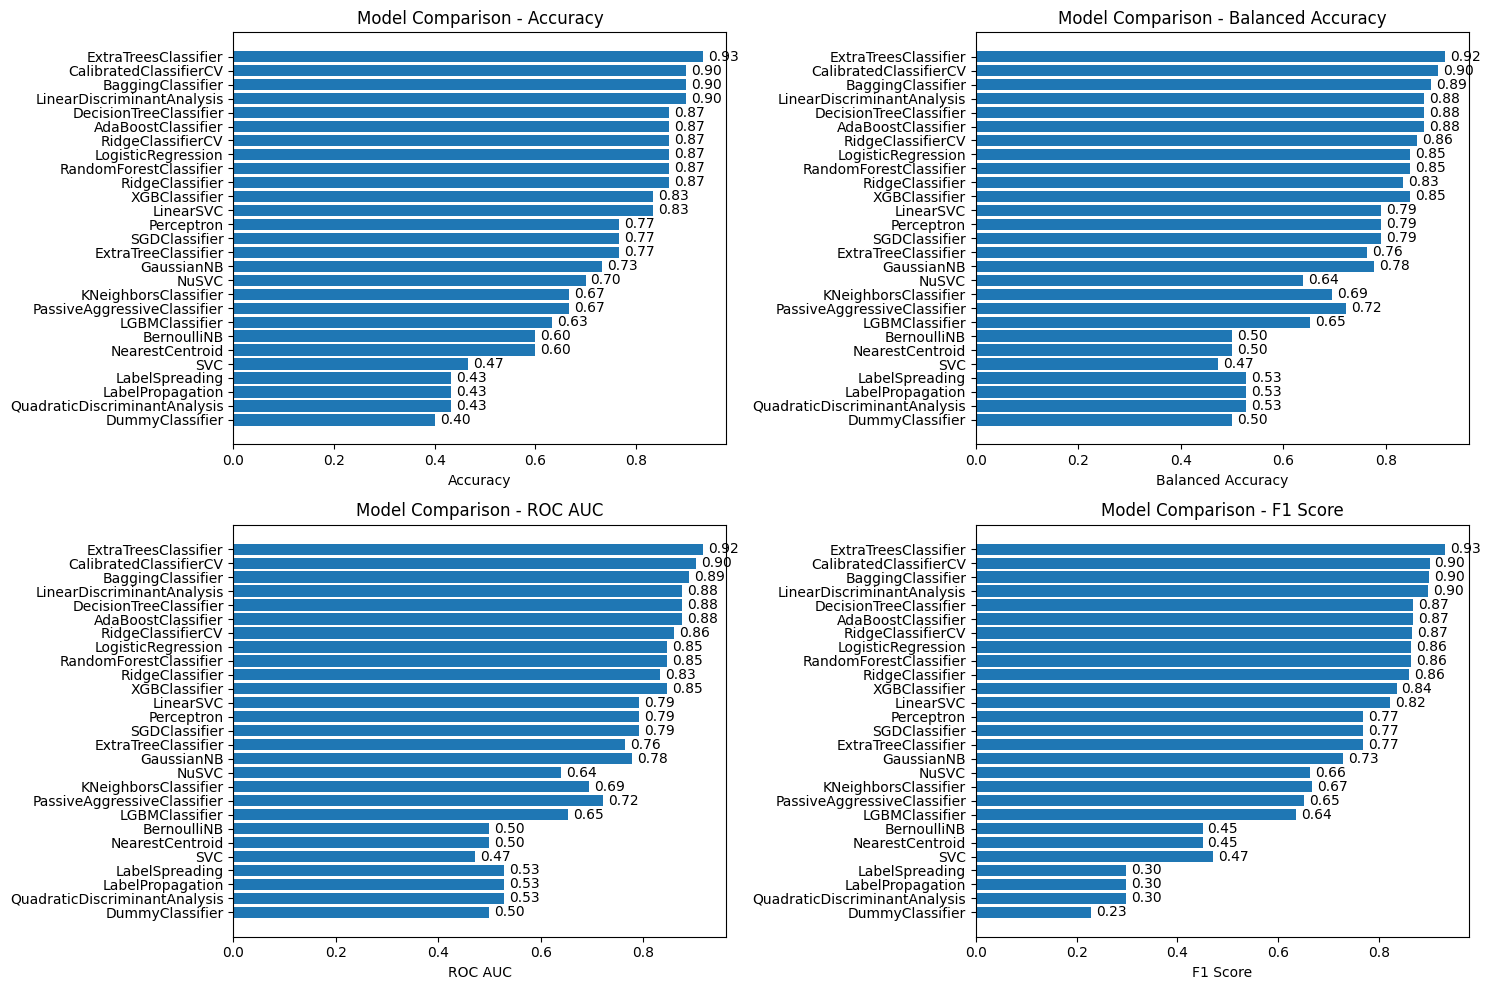

In [112]:
import matplotlib.pyplot as plt

# Sort models by Accuracy
models_sorted = models.sort_values(by="Accuracy", ascending=False)

# Select metrics to plot
metrics = ["Accuracy", "Balanced Accuracy", "ROC AUC", "F1 Score"]

# Plot each metric as a separate subplot
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 metrics
    bars = plt.barh(models_sorted.index, models_sorted[metric])
    plt.xlabel(metric)
    plt.title(f"Model Comparison - {metric}")
    plt.gca().invert_yaxis()

    # Add value labels on each bar
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01,                 # x position (slightly to the right of bar)
                 bar.get_y() + bar.get_height()/2,  # y position (centered)
                 f"{width:.2f}",               # format to 2 decimals
                 va='center')

plt.tight_layout()
plt.show()

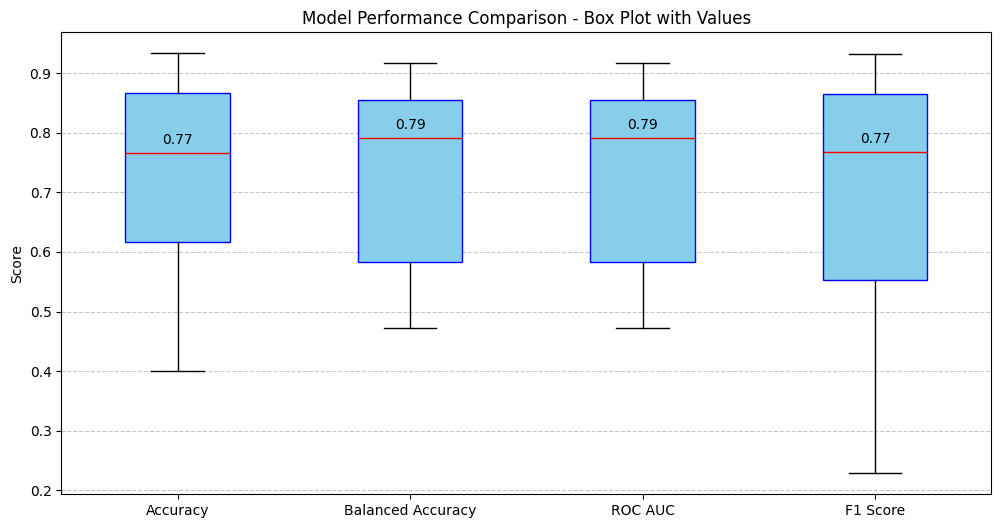

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Sort models by Accuracy (just for consistency)
models_sorted = models.sort_values(by="Accuracy", ascending=False)

# Metrics to plot
metrics = ["Accuracy", "Balanced Accuracy", "ROC AUC", "F1 Score"]

# Prepare data for the box plot
box_data = [models_sorted[metric] for metric in metrics]

# Create the box plot
plt.figure(figsize=(12, 6))
box = plt.boxplot(box_data, labels=metrics, patch_artist=True,
                  boxprops=dict(facecolor="skyblue", color="blue"),
                  medianprops=dict(color="red"))

# Add grid and title
plt.title("Model Performance Comparison - Box Plot with Values")
plt.ylabel("Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add median values on top of each box
for i, metric in enumerate(metrics):
    median_val = np.median(box_data[i])
    plt.text(i+1, median_val + 0.01, f"{median_val:.2f}",  # position and value
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

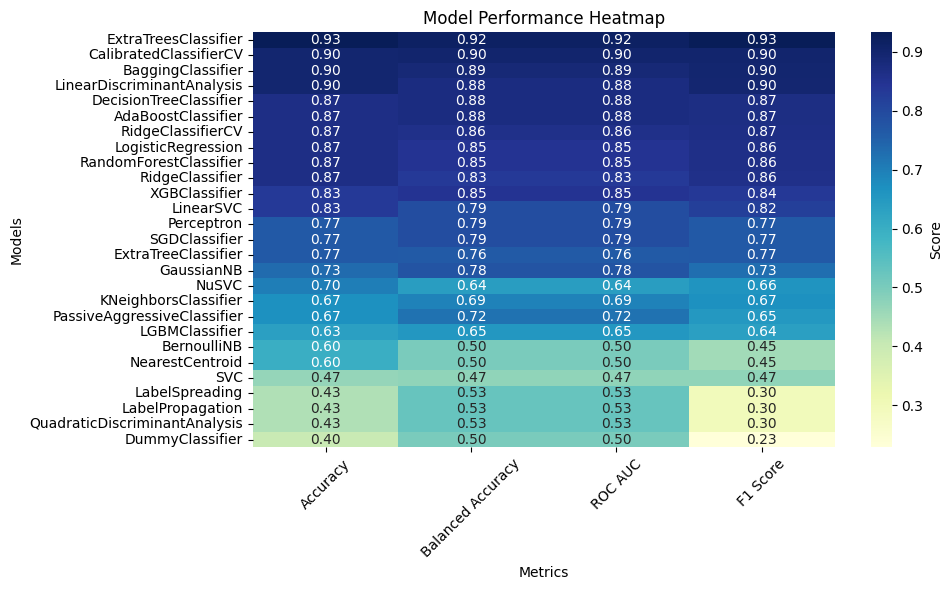

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort models by Accuracy (for better visualization order)
models_sorted = models.sort_values(by="Accuracy", ascending=False)

# Metrics to visualize
metrics = ["Accuracy", "Balanced Accuracy", "ROC AUC", "F1 Score"]

# Prepare data for the heatmap
heatmap_data = models_sorted[metrics]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Score'})

plt.title("Model Performance Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()